# Importing Libraries

In [1]:
# Importing libraries that are required to build this project
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from IPython.display import Image
import pydotplus

# Task 1: Retrieving and Preparing the Data

#### Importing Data File

In [2]:
# Importing 'heart_failure_clinical_records_dataset.csv' datset
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
# Checking wheteher the data is importation is proper

# previewing first 5 rows of dataset to check whether data is loaded properly 
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# It's look ok

# checking the data types of different variables present in Dataset
heart_df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [5]:
# previewing the shape of dataset
print("Shape of dataset : {}".format(heart_df.shape))

Shape of dataset : (299, 13)


In [6]:
# 299 rows and 13 variables are present in "heart_failure_clinical_records_dataset" datasets 

heart_df.info()
# all are numeric features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
heart_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
# no null value in any of the variables 

# checking for suspicious values that can be null
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Task 2: Data Exploration

<AxesSubplot:>

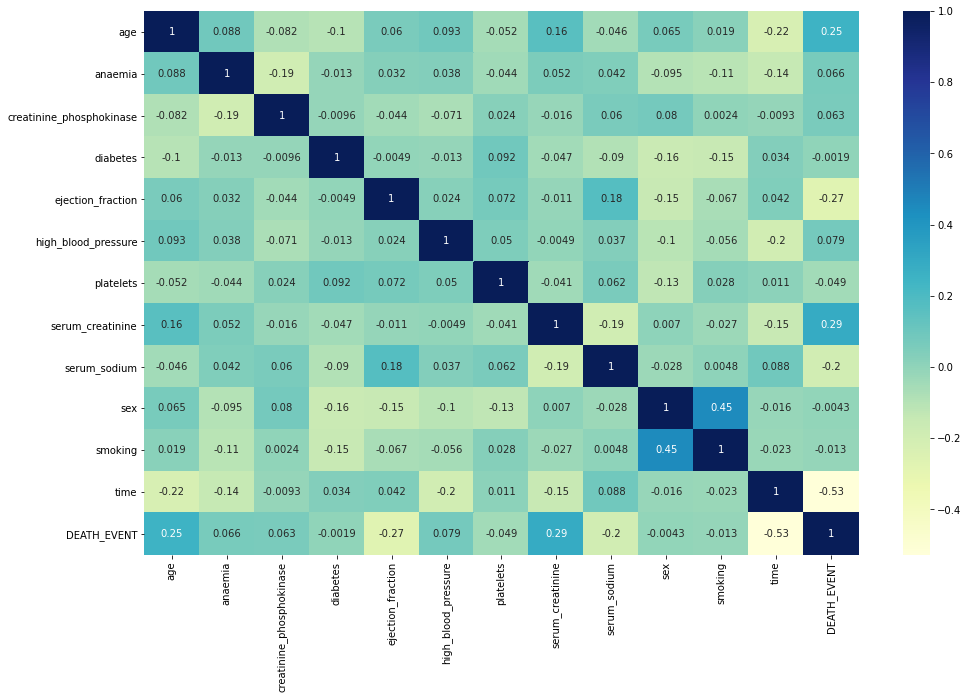

In [9]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(heart_df.corr(method='pearson'), annot=True,cmap="YlGnBu")

In [10]:
# As we can see that none of the features are highly correlated (not greater than 0.5) we cannot remove any columns.

### Task 2.1 Exploring all numerical variables

##### Analyzing Continuous Variables

Text(0.5, 1.0, 'Distribution of Age variable')

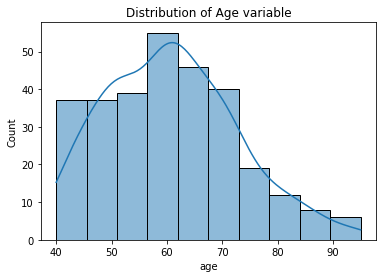

In [11]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=heart_df, x="age", kde=True)
plt.title("Distribution of Age variable")

Text(0.5, 1.0, 'Distribution of creatinine_phosphokinase variable')

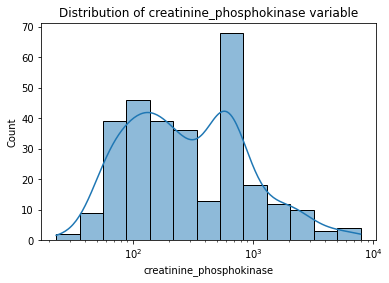

In [12]:
# since the data was right skewed used log transformation to correct the skewness
sns.histplot(data=heart_df, x="creatinine_phosphokinase", kde=True,log_scale=True)
plt.title("Distribution of creatinine_phosphokinase variable")

Text(0.5, 1.0, 'Distribution of ejection_fraction variable')

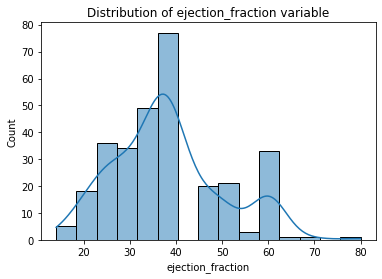

In [13]:
sns.histplot(data=heart_df, x="ejection_fraction", kde=True)
plt.title("Distribution of ejection_fraction variable")

Text(0.5, 1.0, 'Distribution of platelets variable')

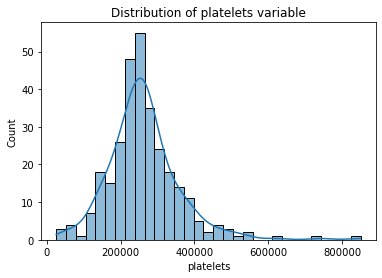

In [14]:
sns.histplot(data=heart_df, x="platelets", kde=True)
plt.title("Distribution of platelets variable")

Text(0.5, 1.0, 'Distribution of serum_creatinine variable')

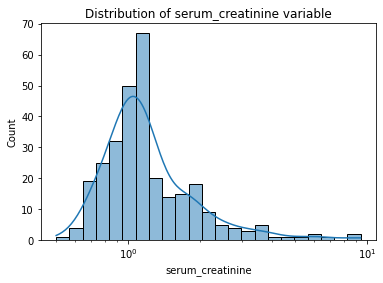

In [15]:
# since the data was left skewed used log transformation to correct the skewness
sns.histplot(data=heart_df, x="serum_creatinine", kde=True,log_scale=True)
plt.title("Distribution of serum_creatinine variable")

Text(0.5, 1.0, 'Distribution of serum_sodium variable')

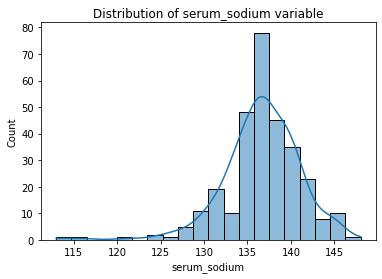

In [16]:
sns.histplot(data=heart_df, x="serum_sodium", kde=True)
plt.title("Distribution of serum_sodium variable")

Text(0.5, 1.0, 'Distribution of time variable')

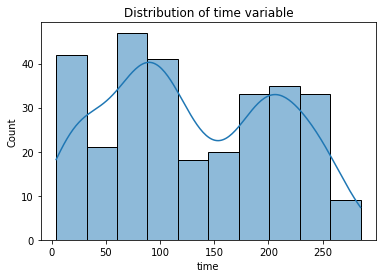

In [17]:
sns.histplot(data=heart_df, x="time", kde=True)
plt.title("Distribution of time variable")

##### Analyzing Categorical Variables

Text(0.5, 1.0, 'Distribution of anaemia variable')

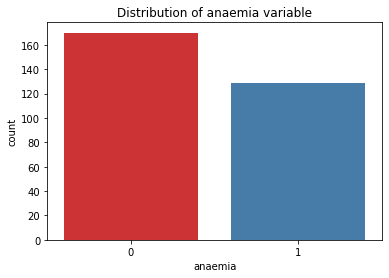

In [18]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(x="anaemia", data=heart_df,palette="Set1")
plt.title("Distribution of anaemia variable")

Text(0.5, 1.0, 'Distribution of diabetes variable')

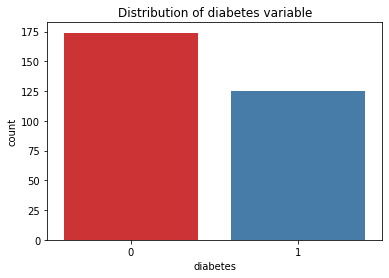

In [19]:
sns.countplot(x="diabetes", data=heart_df,palette="Set1")
plt.title("Distribution of diabetes variable")

Text(0.5, 1.0, 'Distribution of high_blood_pressure variable')

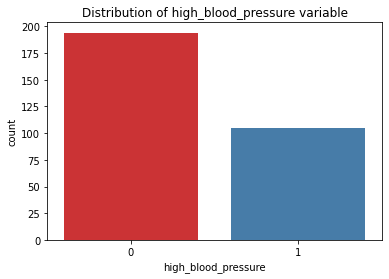

In [20]:
sns.countplot(x="high_blood_pressure", data=heart_df,palette="Set1")
plt.title("Distribution of high_blood_pressure variable")

Text(0.5, 1.0, 'Distribution of sex variable')

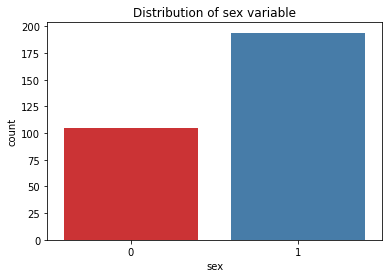

In [21]:
sns.countplot(x="sex", data=heart_df,palette="Set1")
plt.title("Distribution of sex variable")

Text(0.5, 1.0, 'Distribution of smoking variable')

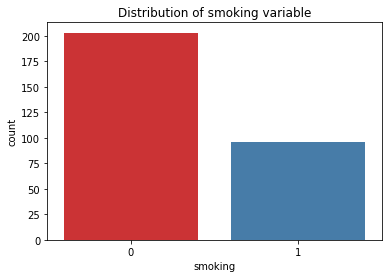

In [22]:
sns.countplot(x="smoking", data=heart_df,palette="Set1")
plt.title("Distribution of smoking variable")

### Task2.2 Relationship Between Variables

Text(0.5, 1.0, 'Relationship between high_blood_pressure and serum_sodium')

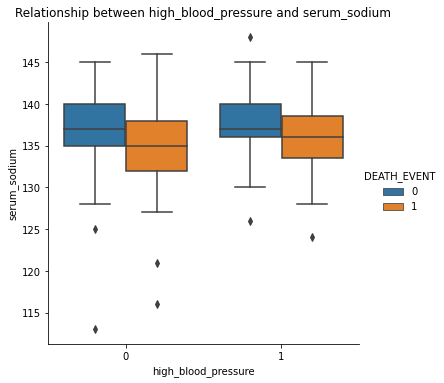

In [23]:
# https://seaborn.pydata.org/tutorial/categorical.html

sns.catplot(x='high_blood_pressure', y="serum_sodium",hue = 'DEATH_EVENT', kind="box", data=heart_df)
plt.title("Relationship between high_blood_pressure and serum_sodium")

Text(0.5, 1.0, 'Relationship between diabetes and creatinine_phosphokinase')

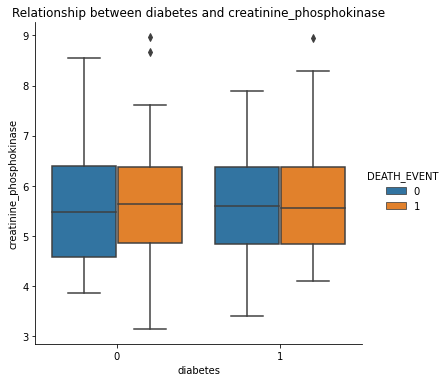

In [24]:
# There is strong relationship between high_blood_pressur and serum_sodium.Excessive slat intake can lead to hypertension
# (high blood pressur) which stiffens and narrows the blood vessels.Blood and oxygen flow to key organs decreases.
# https://health.clevelandclinic.org/kidneys-salt-and-blood-pressure-you-need-a-delicate-balance/#:~:text=Over%20time%2C%20excessive%20salt%20intake,which%20further%20increases%20blood%20pressure.

heart_df['creatinine_phosphokinase'] = np.log(heart_df['creatinine_phosphokinase'])
sns.catplot(x='diabetes', y="creatinine_phosphokinase",hue = 'DEATH_EVENT', kind="box",data=heart_df)
plt.title("Relationship between diabetes and creatinine_phosphokinase")

Text(0.5, 1.0, 'Relationship between DEATH_EVENT and serum_creatinine')

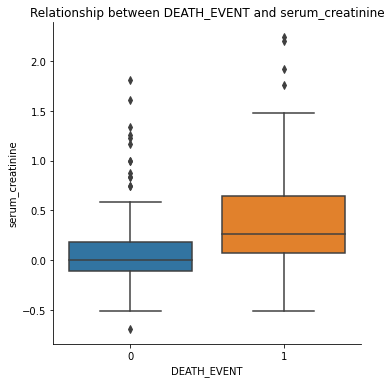

In [25]:
# There is no direct relationship betweeen diabetes and Creatinine_phosphokinase.

heart_df['serum_creatinine'] = np.log(heart_df['serum_creatinine'])
sns.catplot(x='DEATH_EVENT', y="serum_creatinine", kind="box", data=heart_df)
plt.title("Relationship between DEATH_EVENT and serum_creatinine")

Text(0.5, 1.0, 'Relationship between diabetes and age')

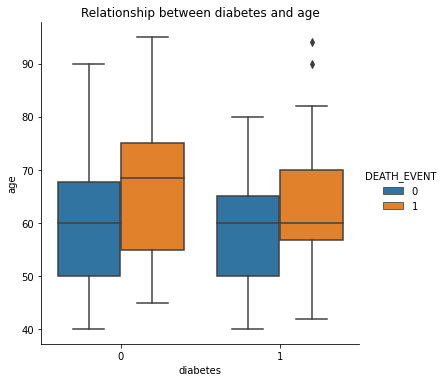

In [26]:
# Elevated creatinine marks damage to kidney which in turn affects normal function of other organs. 
# Thus Death event is more in the cases of elevated creatinine levels

sns.catplot(x='diabetes', y="age", hue = 'DEATH_EVENT', kind="box", data=heart_df)
plt.title("Relationship between diabetes and age")

Text(0.5, 1.0, 'Relationship between high_blood_pressure and ejection_fraction')

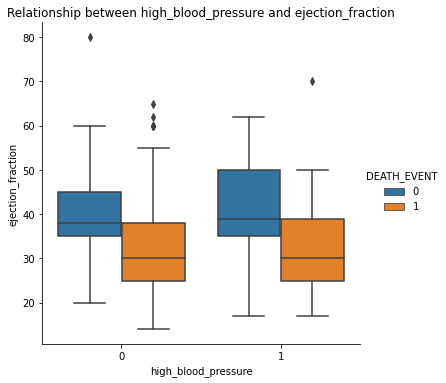

In [27]:
# Patient's with age between 45 to 65 have more diabetic problem then any other age groups and are vunlarable to
# heart failure.

sns.catplot(x='high_blood_pressure', y="ejection_fraction", hue="DEATH_EVENT", kind="box", data=heart_df)
plt.title("Relationship between high_blood_pressure and ejection_fraction")

Text(0.5, 1.0, 'Relationship between DEATH_EVENT and ejection_fraction')

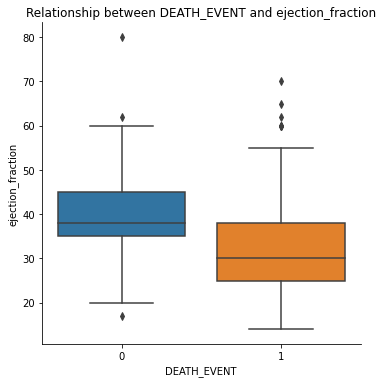

In [28]:
# Normal ejection fraction is between 50% to 75%, so low ejection fraction leads to more death

sns.catplot(x='DEATH_EVENT', y="ejection_fraction", kind="box", data=heart_df)
plt.title("Relationship between DEATH_EVENT and ejection_fraction")

Text(0.5, 1.0, 'Relationship between high_blood_pressure and serum_creatinine')

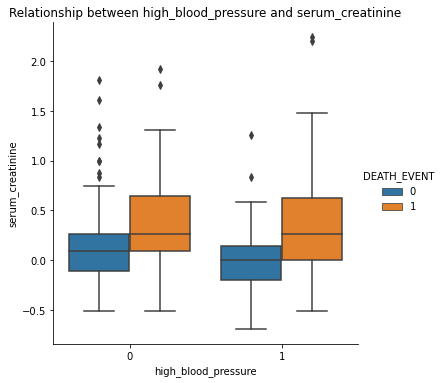

In [29]:
# High BP though increases ejection fraction but long term effect of high BP increases chances of death as well
# Normal ejection fraction is between 50% to 75%, so low ejection fraction leads to more death

sns.catplot(x='high_blood_pressure', y="serum_creatinine",hue = 'DEATH_EVENT', kind="box", data=heart_df)
plt.title("Relationship between high_blood_pressure and serum_creatinine")

Text(0.5, 1.0, 'Relationship between anameia and ejection_fraction')

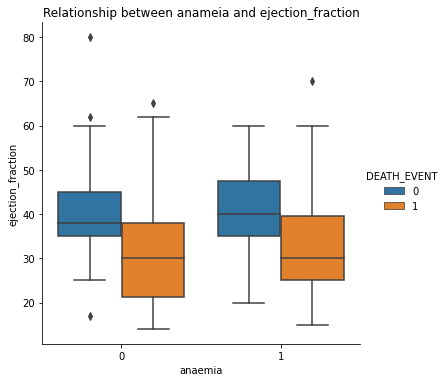

In [30]:
# Presence of high Blood pressure affects other organs as well like kidney and increases creatinine.

sns.catplot(x='anaemia', y="ejection_fraction",hue = 'DEATH_EVENT', kind="box", data=heart_df)
plt.title("Relationship between anameia and ejection_fraction")

Text(0.5, 1.0, 'Relationship between smoking and ejection_fraction')

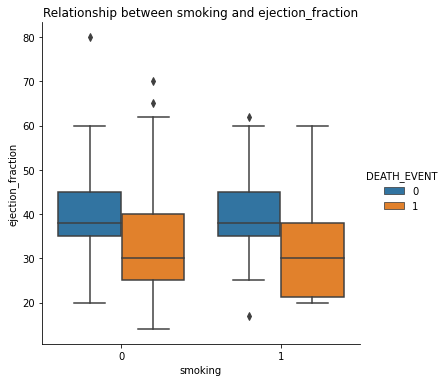

In [31]:
# Anaemia can effect ejection fraction

sns.catplot(x='smoking', y="ejection_fraction",hue = 'DEATH_EVENT', kind="box", data=heart_df)
plt.title("Relationship between smoking and ejection_fraction")

Text(0.5, 1.0, 'Relationship between anameia and age')

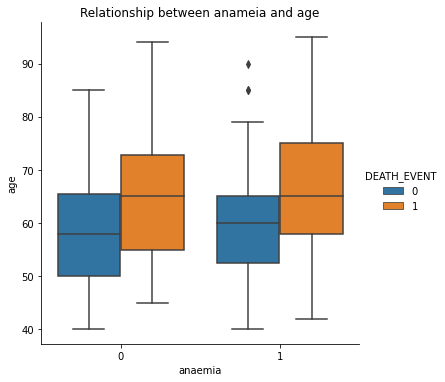

In [32]:
# Smoking causes decrease in ejection fraction

sns.catplot(x='anaemia', y="age",hue = 'DEATH_EVENT', kind="box", data=heart_df)
plt.title("Relationship between anameia and age")

Text(0.5, 1.0, 'Relationship between serum_creatinine and platelets')

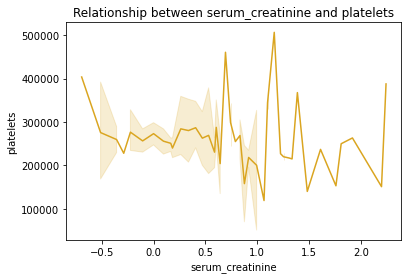

In [33]:
# There is no clear relationship between age and anaemia leading to death
# https://seaborn.pydata.org/generated/seaborn.lineplot.html

sns.lineplot(data= heart_df, x='serum_creatinine',y='platelets', color='goldenrod')
plt.title("Relationship between serum_creatinine and platelets")

In [ ]:
# As the serum_creatine level increses the count of platelete decreses.So,to maintain high platelete it suggested to 
# maintain low creatine level.

# Task 3: Data Modeling

## Training and Testing the data

#### Splitting Data & Feature Scaling

In [34]:
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
X = heart_df[features]
y = heart_df.iloc[:,-1]

#### Train and Test Model 

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=2)

In [36]:
print("X-train shape: {}".format(X_train.shape))
print("y-train shape: {}".format(y_train.shape))

X-train shape: (209, 12)
y-train shape: (209,)


In [37]:
print("X-test shape: {}".format(X_test.shape))
print("y-test shape: {}".format(y_test.shape))

X-test shape: (90, 12)
y-test shape: (90,)


## K-Nearest Neighbors classifier

In [38]:
# train and predict 
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train,y_train)
print("Test set score: {:.2f}" .format(kn_clf.score(X_test,y_test)))

Test set score: 0.67


In [39]:
# previewing confusion matrix
prediction = kn_clf.predict(X_test)
cm = confusion_matrix(y_test, prediction)
print(cm)

[[54 12]
 [18  6]]


In [40]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        66
           1       0.33      0.25      0.29        24

    accuracy                           0.67        90
   macro avg       0.54      0.53      0.53        90
weighted avg       0.64      0.67      0.65        90



In [41]:
# Optimizing Knn Performance by changing k value 
k = 23
knn = KNeighborsClassifier(n_neighbors = k)# p = 2 is for euclidean_distance which is by default
knn.fit(X_train,y_train)
print("Test set score: {:.2f}" .format(knn.score(X_test,y_test)))

Test set score: 0.70


In [42]:
predict = kn_clf.predict(X_test)
cm1 = confusion_matrix(y_test, predict)
print(cm1)

[[54 12]
 [18  6]]


In [43]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        66
           1       0.33      0.25      0.29        24

    accuracy                           0.67        90
   macro avg       0.54      0.53      0.53        90
weighted avg       0.64      0.67      0.65        90



## Decision Tree

In [44]:
# train and test
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
print("Test set score: {:.2f}" .format(dt_clf.score(X_test,y_test)))

Test set score: 0.79


In [45]:
# previewing confusion matrix
predict = dt_clf.predict(X_test)
cm = confusion_matrix(y_test, predict)
print(cm)

[[54 12]
 [ 7 17]]


In [46]:
# previewing classification report 
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        66
           1       0.59      0.71      0.64        24

    accuracy                           0.79        90
   macro avg       0.74      0.76      0.75        90
weighted avg       0.81      0.79      0.79        90



In [47]:
# Optimizing Decision Tree Performance
dt_clf1 = DecisionTreeClassifier(max_leaf_nodes = 10, random_state=0)
dt_clf1.fit(X_train,y_train)
print("Test set score: {:.2f}" .format(dt_clf1.score(X_test,y_test)))

Test set score: 0.89


In [48]:
# previewing confusion matrix
pr = dt_clf1.predict(X_test)
cm = confusion_matrix(y_test, pr)
print(cm)

[[62  4]
 [ 6 18]]


In [49]:
# previewing classification report 
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        66
           1       0.82      0.75      0.78        24

    accuracy                           0.89        90
   macro avg       0.86      0.84      0.85        90
weighted avg       0.89      0.89      0.89        90



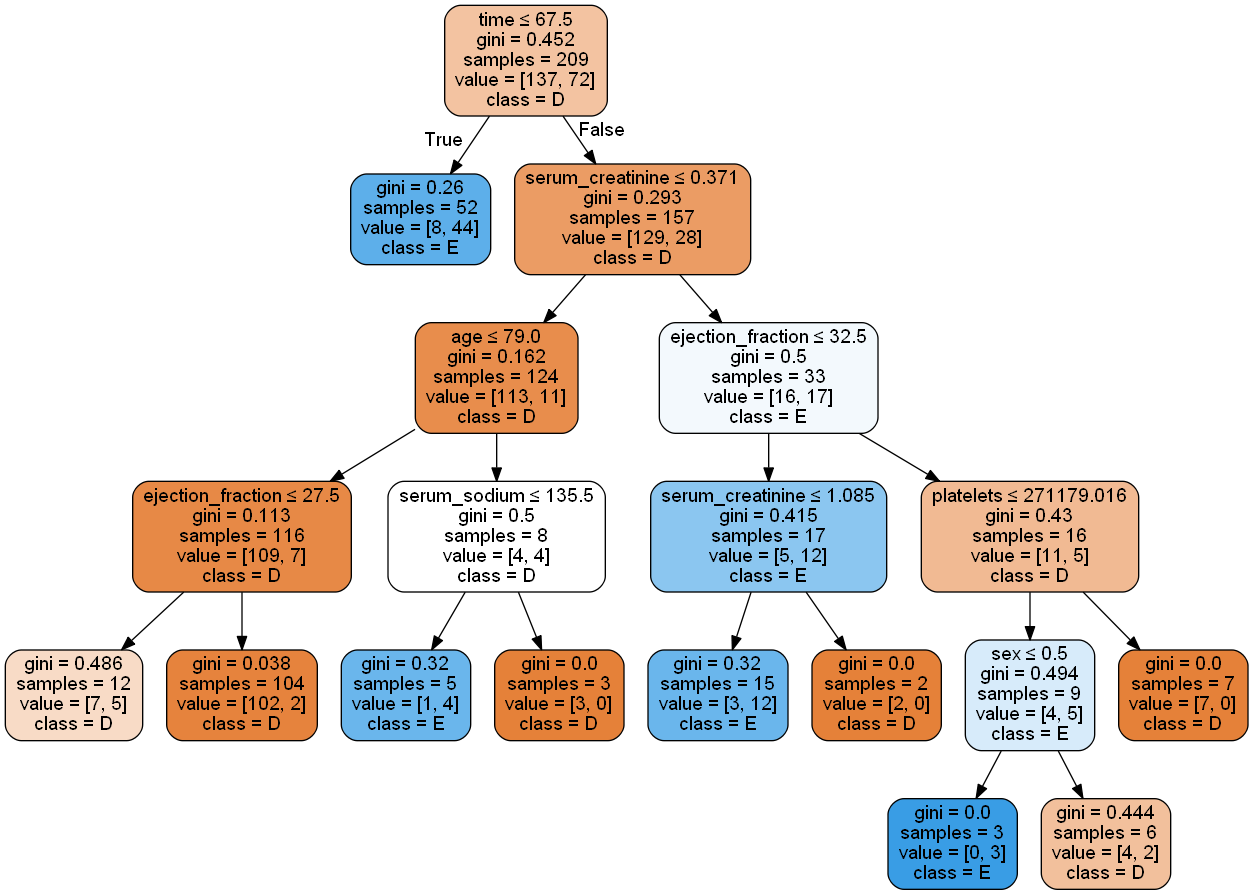

In [50]:
# tree visualization

# Created DOT data
dot_data = tree.export_graphviz(dt_clf1, out_file=None,feature_names=features
                                ,class_names='DEATH_EVENT',filled=True, rounded=True, special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())
                